In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis, skew

In [17]:
cu_st = pd.read_excel("cu_st.xlsx",index_col='Date')

In [10]:
data_px = pd.read_excel("FuturesSeries.xlsx", sheet_name= 'Data')


In [22]:
cu_px = pd.DataFrame(data_px['COPPER']).dropna()


In [18]:
from fredapi import Fred
fred = Fred(api_key='7c161acab6738b3fe57d68ce58877860')
CPI = pd.DataFrame(fred.get_series('CPIAUCSL'))
CPI.columns = ['index']
# create index multiplier
CPI['CPI_Multiplier'] = CPI['index'].iloc[-1] / CPI['index']
CPI = CPI.loc[(cu_px.iloc[0].name).replace(day=1) :]
CPI.head(4)

,index,CPI_Multiplier
2004-01-01,186.3,1.384611
2004-02-01,186.7,1.381644
2004-03-01,187.1,1.378691
2004-04-01,187.4,1.376483


In [23]:
s1 = cu_px.join(CPI, how='outer')
s1=s1.drop('index',axis=1)
s1['CPI_Multiplier'] = s1['CPI_Multiplier'].fillna(method='ffill')
columns = list(cu_px.columns) + list(['CPI_Multiplier'])
s1.columns = columns
c1 = s1[columns].multiply(s1['CPI_Multiplier'], axis="index")
c1 = c1.drop(['CPI_Multiplier'],axis=1)
c1 = c1.dropna()



In [31]:
cu_data = c1.join(cu_st, how='inner')
cu_data.head(2)

,COPPER,Stock
2004-01-05,3301.950707,428575
2004-01-06,3251.758564,426075


In [32]:
def rolling_corr(data):
    # This function returns two outputs: (1) Column names --> col_names (2) Dataframe of correlation time series --> roll_corr
# Create appended column names
    col_names= []
    for i in list(range(0,data.shape[1])):
        for j in list(range(0,data.shape[1])):
            if i==j:
                pass
            else:
                name = data.columns[i]+'_'+data.columns[j]
                col_names.append(name)
                
# Create rolling correlation
    roll_corr= pd.DataFrame(columns= col_names)
    k=0
    while k <= len(col_names)-1:
        for i in range(0,data.shape[1]):
            for j in range(0,data.shape[1]):
                if i==j: # ignore same names
                    pass
                else:
                    output = data.iloc[:,i].rolling(756).corr(data.iloc[:,j])
                    roll_corr.iloc[:,k]= output
                    k+= 1            
    roll_corr= roll_corr.dropna()
    return col_names, roll_corr

In [38]:
[comm_col_names, comm_roll_corr] = rolling_corr(cu_data)
comm_roll_corr.head(3)

,COPPER_Stock,Stock_COPPER
2007-02-01,0.000778,0.000778
2007-02-02,0.008138,0.008138
2007-02-05,0.015755,0.015755


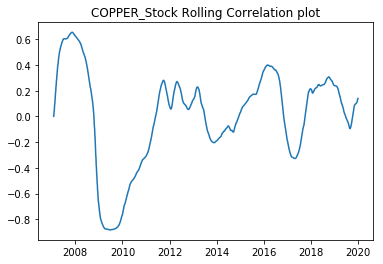

In [41]:
comm_col_names
i = 0
while i <= len(comm_col_names)-1:
    plt.plot(comm_roll_corr.iloc[:,i])
    plt.title('%s Rolling Correlation plot' % comm_col_names[i])
    text = '%s Rolling Correlation plot' % comm_col_names[i]
    #plt.savefig("%s.png" % text)
    plt.show()
    i+= 2

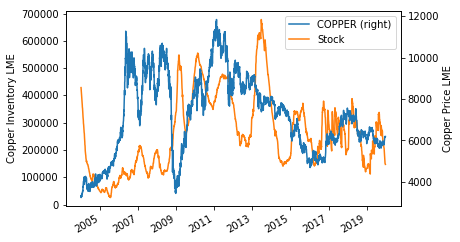

In [149]:
ax = cu_data.plot(secondary_y=['COPPER'])
ax.set_ylabel('Copper Inventory LME')
ax.right_ax.set_ylabel('Copper Price LME')
plt.show()

In [ ]:
#OIL

In [119]:
wti_px = pd.read_excel("wti.xlsx",)
wti_px = wti_px.set_index(wti_px['Exchange Date'])
wti_px = pd.DataFrame(wti_px['Close'])


In [113]:
from fredapi import Fred
fred = Fred(api_key='7c161acab6738b3fe57d68ce58877860')
CPI = pd.DataFrame(fred.get_series('CPIAUCSL'))
CPI.columns = ['index']
# create index multiplier
CPI['CPI_Multiplier'] = CPI['index'].iloc[-1] / CPI['index']
CPI = CPI.loc[(wti_px.iloc[0].name).replace(day=1) :]

s1 = wti_px.join(CPI, how='outer')
s1=s1.drop('index',axis=1)
s1['CPI_Multiplier'] = s1['CPI_Multiplier'].fillna(method='ffill')
columns = list(wti_px.columns) + list(['CPI_Multiplier'])
s1.columns = columns
o1 = s1[columns].multiply(s1['CPI_Multiplier'], axis="index")
o1 = o1.drop(['CPI_Multiplier'],axis=1)
o1 = o1.dropna()
o1.head(3)

,Close
2000-05-10,42.339248
2000-05-11,43.861050
2000-05-12,44.629485


In [115]:
wti_st = pd.read_excel("wti_st.xls")
wti_st = wti_st.set_index(wti_st['Date'])
wti_st = wti_st.drop(['Date'],axis=1)
wti_st = wti_st.resample('B').first().fillna(method='pad')
wti_st.head(3)

,U.S. Ending Stocks of Crude Oil (Th. Brls)
Date,
2000-05-05,862020.0
2000-05-08,862020.0
2000-05-09,862020.0


In [120]:
wti_data = o1.join(wti_st, how='inner')
wti_data.head()

,Close,U.S. Ending Stocks of Crude Oil (Th. Brls)
2000-05-10,42.339248,862020.0
2000-05-11,43.861050,862020.0
2000-05-12,44.629485,862270.0
2000-05-15,45.081506,862270.0
2000-05-16,44.795226,862270.0


In [130]:
[comm_col_names, comm_roll_corr] = rolling_corr(wti_data)
comm_roll_corr.head(3)

,Close_U.S. Ending Stocks of Crude Oil (Th. Brls),U.S. Ending Stocks of Crude Oil (Th. Brls)_Close
2003-05-22,-0.123837,-0.123837
2003-05-23,-0.123881,-0.123881
2003-05-27,-0.124119,-0.124119


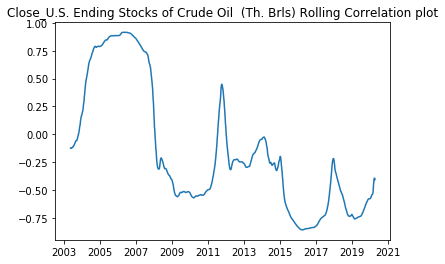

In [142]:

i = 0
while i <= len(comm_col_names)-1:
    
    
    #ax = wti_data['Close'].plot(secondary_y=['Close'])
    #ax = comm_roll_corr.iloc[:,i].plot()
    
    #ax.set_ylabel('Oil Price Scale')
    #ax.right_ax.set_ylabel('Oil Price Scale')

    
    plt.plot(comm_roll_corr.iloc[:,i])
    
    plt.title('%s Rolling Correlation plot' % comm_col_names[i])
    text = '%s Rolling Correlation plot' % comm_col_names[i]
    #plt.savefig("%s.png" % text)
    #mb = wti_data.plot(secondary_y=['Close'])


    plt.show()
    i+= 2

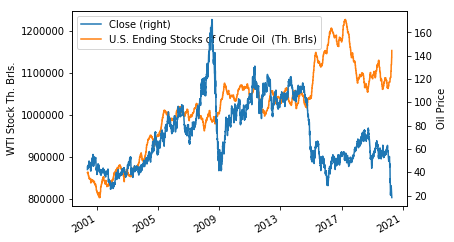

In [144]:
ax = wti_data.plot(secondary_y=['Close'])
ax.set_ylabel('WTI Stock Th. Brls.')
ax.right_ax.set_ylabel('Oil Price')
plt.show()